In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
missing_values = [" ?"]
german_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',header=None, sep = " ", na_values = missing_values)
german_col_names = ['chk_status', 'mth_dur', 'credit_his', 'purpose', 'credit_amt', 'svgs_acct', 'emp_since', 'inst_rate', 'personal_status_sex', 'guarantors', 'current_res', 'property', 'age', 'inst_plans', 'housing', 'existing_credits', 'job', 'liable_people', 'telephone', 'foreign_worker', 'class']
german_data.columns = german_col_names
german_data.head()

,chk_status,mth_dur,credit_his,purpose,credit_amt,svgs_acct,emp_since,inst_rate,personal_status_sex,guarantors,...,property,age,inst_plans,housing,existing_credits,job,liable_people,telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
le = LabelEncoder()
Y = german_data['class']
X = german_data.drop(['class'], axis=1)
g_accuracy, g_precision, g_fMeasure = [], [], []

for columns in X:
    X[columns] = le.fit_transform(X[columns])


F-measure on test data is 0.67
Time elapsed: 0.04
---
F-measure on test data is 0.62
Time elapsed: 0.04
---
F-measure on test data is 0.66
Time elapsed: 0.04
---
F-measure on test data is 0.57
Time elapsed: 0.04
---
F-measure on test data is 0.67
Time elapsed: 0.03
---


Text(0, 0.5, 'Accuracy')

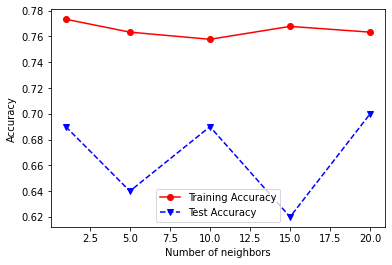

In [12]:
numNeighbors = [1, 5, 10, 15, 20]
trainAcc = []
testAcc = []
g_fMeasure = []
g_time = []

for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.9)
    clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    g_start = time.time()
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    g_end = time.time()
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))
    g_fMeasure.append(f1_score(y_test, y_predTest, average = 'weighted'))
    g_time.append(g_end - g_start)
    print('F-measure on test data is %.2f' % (g_fMeasure[i]))
    print('Time elapsed: %.2f' % (g_time[i]))
    print('---')

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')